# Agent Engineering

### An agent that can answer questions about the database

#### Baseline
- The baseline is just prompt engineering with code execution.
- It's able to generate Python code to get the results and visualizations.


#### Vibe Evals
- I started with gpt-4o-mini for nostalgic reasons, but it didn't perform well.
- Switching to gpt-4.1-mini improved the results dramatically while still being cost effective.
- Generating Python code to create a df with the results is much simpler than generating a visualization.
- The baseline simple prompt and code execution calls are a great starting point. It's able to generate code that is executable and visualizations for most of my questions with various styles.
- Asking the agent to forecast failed as expected. I noticed it needed to install more packages, so I need to give it terminal access (in a sandboxed environment).

#### Next Steps:
- Build out the agentic process with more infrastructure.
- I'm envisioning a planning agent, coding agent, QA agent, and a reporting agent.
    - The planning agent will intake the user's question and provide more detailed instructions to the coding agent.
    - The coding agent will generate the code based on the planning agent's instructions.
    - The QA agent will test the code and provide feedback to the planning agent.
    - The reporting agent will take the final results and generate a report.
    - The planning agent will then update the instructions and the cycle repeats until a satisfactory answer is found.
- The code style and reporting should be standardized.
- Once this is working, I'll add a ML coding agent to generate the code for the ML models.
    - This should be something the planning agent can initialize.
- I need safety checks to ensure the code is safe to execute.
- The code should be executed in a sandboxed environment and be able to run it's own terminal commands, including installing packages.

#### Future Considerations
- The agent should eventually have a memory to remember the user's prefered styles.
- The agent could benefit from a cache of previous questions and answers to avoid recacling the same question.
- More complex database structures would need more advanced metadata and potential RAG solutions to answer questions effectively.
- A deep research agent could be added for more open ended and complex questions.

In [1]:
import litellm
import pandas as pd
import numpy as np
import dotenv
from io import StringIO
import csv
import os
import sys

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

dotenv.load_dotenv()

True

In [3]:
from agent.baseline import BaselineAgent

agent = BaselineAgent()

In [3]:
code = agent.generate_code("Show me revenue by product category")
print(code)

import pandas as pd

# Load necessary data
df_orders = pd.read_csv('../data/orders.csv')
df_products = pd.read_csv('../data/products.csv')

# Merge orders with products to get product category and price
df_merged = pd.merge(df_orders, df_products[['product_id', 'product_category', 'product_price']], on='product_id', how='left')

# Calculate revenue per order line (assuming quantity = 1 per order_seq_nbr)
# If quantity is not given, each order_seq_nbr represents one unit sold
df_merged['revenue'] = df_merged['product_price']

# Group by product category and sum revenue
revenue_by_category = df_merged.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

# Print the result
print(revenue_by_category)


In [4]:
exec(code)

product_category
Electronics    434754.17
Clothing        56725.92
Drinks           2664.96
Name: revenue, dtype: float64


   order_month  product_price
0      2021-01        3158.24
1      2021-02        7270.30
2      2021-03        2868.98
3      2021-04        1604.62
4      2021-05        8087.72
5      2021-06        4129.54
6      2021-07        5579.65
7      2021-08        6747.66
8      2021-09        1463.15
9      2021-10       11030.11
10     2021-11       20419.87
11     2021-12       22701.35
12     2022-01       18701.74
13     2022-02       18824.78
14     2022-03       31354.61
15     2022-04       16225.33
16     2022-05       25447.16
17     2022-06       30418.66
18     2022-07       19715.23
19     2022-08       16297.91
20     2022-09       29207.71
21     2022-10       24399.65
22     2022-11       18551.27
23     2022-12       17225.23
24     2023-01       24948.68
25     2023-02       22866.67
26     2023-03       26545.49
27     2023-04       16254.21
28     2023-05        8074.06
29     2023-06       18609.07
30     2023-07        4264.38
31     2023-08        8546.29
32     202

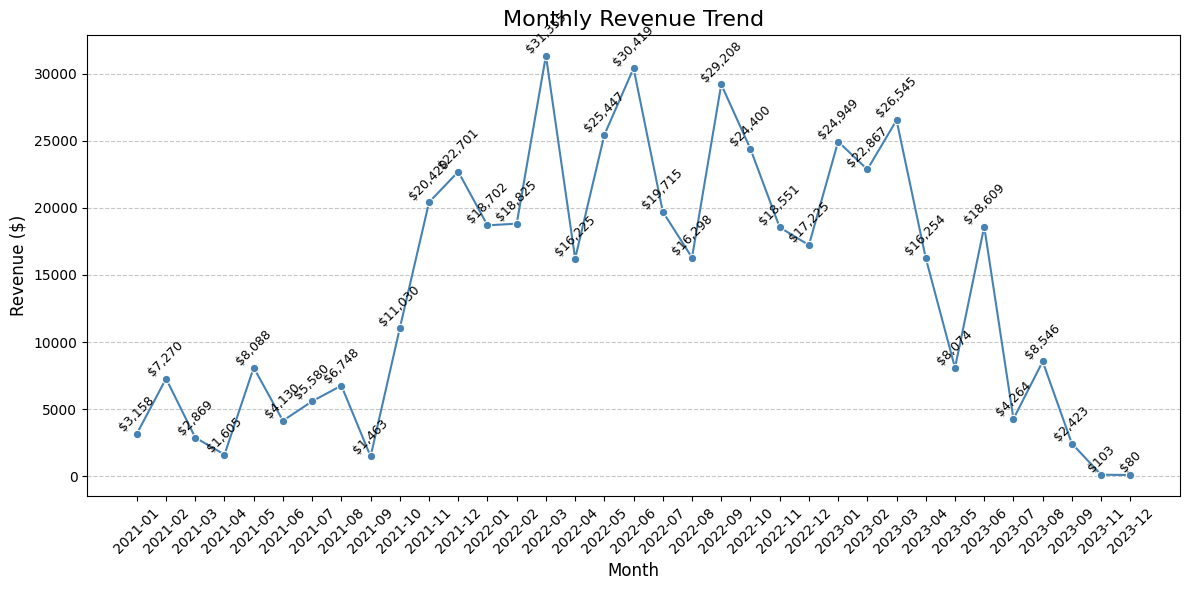

In [5]:
result = agent.analyze("Show me revenue by month", execute=True, include_viz=True)

  product_category        product_name  sales_count
0         Clothing           Basic Tee           87
1           Drinks          Craft Beer           90
2      Electronics  Luxor Ultra Laptop           80


<string>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



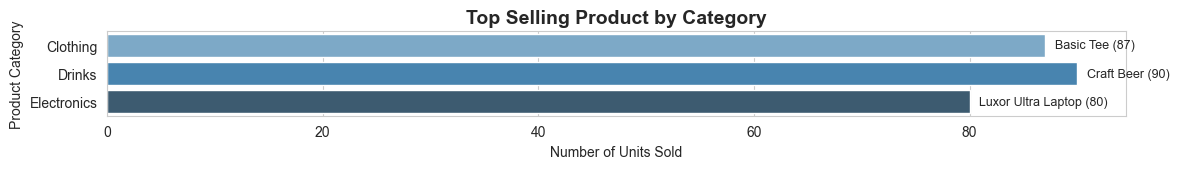

In [6]:
result = agent.analyze(
    "What are the top selling products by category?",
    include_viz=True,
    execute=True
)

    customer_id   customer_city customer_state customer_country  line_revenue
4             5        Brooklyn             NY              USA      19849.38
14           15  St. Petersburg             FL              USA      13538.59
9            10     Los Angeles             CA              USA      11884.48
6             7       San Diego             CA              USA      11722.98
35           36   Staten Island             NY              USA      11057.32
2             3           Miami             FL              USA      10757.59
8             9           Tampa             FL              USA      10668.69
0             1     Los Angeles             CA              USA      10500.78
20           21     Los Angeles             CA              USA      10339.64
25           26       Santa Ana             CA              USA      10166.17


<string>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



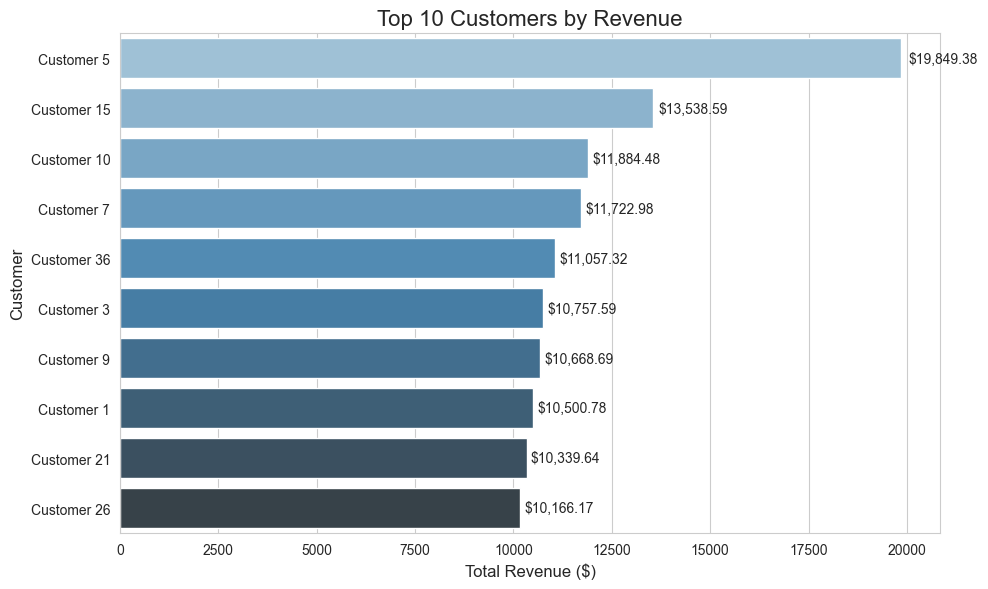

In [7]:
result = agent.analyze(
    "who are the top 10 customers by revenue?",
    include_viz=True,
    execute=True
)

    product_id              product_name    revenue
18          19        Luxor Ultra Laptop  199999.20
21          22      Luxor Pro Smartphone   84499.35
19          20          Mid-Range Laptop   62399.22
22          23           Smartphone Plus   29499.41
20          21             Budget Laptop   20399.32
24          25  Luxor Premium Headphones   20299.42
6            7  Luxor Fine Leather Shoes   13399.33
23          24         Budget Smartphone   12399.38
3            4      Luxor Tailored Pants    9879.24
0            1    Luxor Designer T-Shirt    6559.18


<string>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



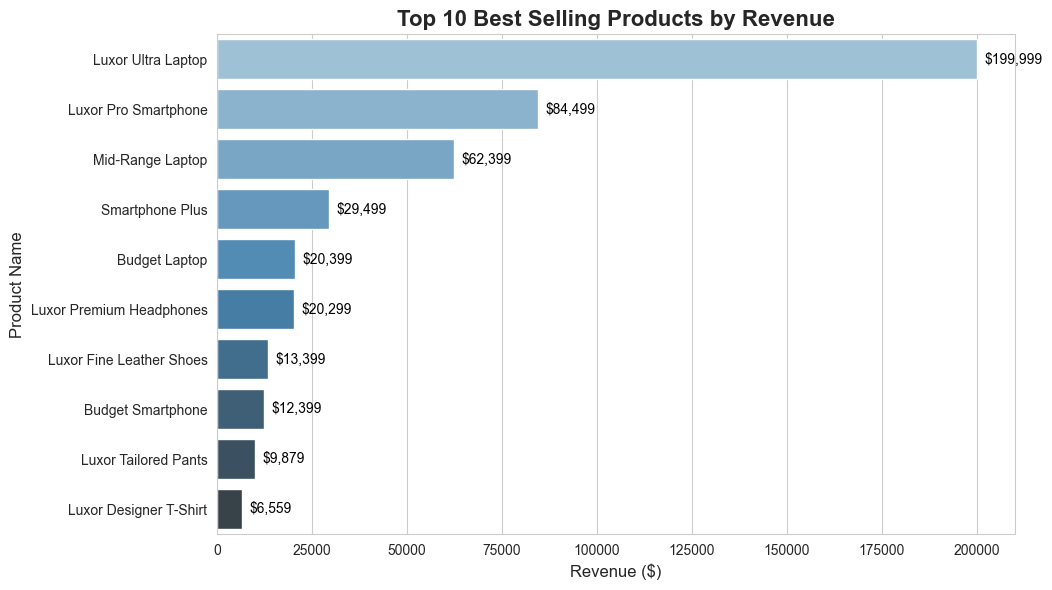

In [9]:
result = agent.analyze(
    "what are the top 10 best selling products by revenue?",
    include_viz=True,
    execute=True
)

customer_class_quartile
Upper Middle 50-75%    0.319149
Bottom 25%             0.255319
Lower Middle 25-50%    0.212766
Top 25%                0.212766
Name: proportion, dtype: float64


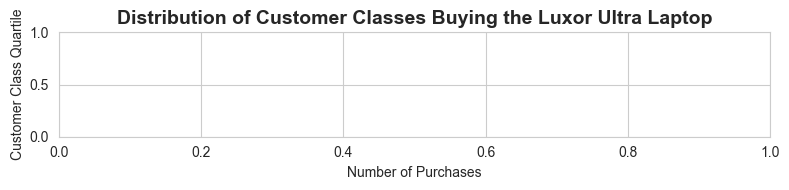

In [10]:
result = agent.analyze(
    "show me the distribution of the classes of the customers who are buying the luxor ultra laptop",
    include_viz=True,
    execute=True
)

Customer 5 spends the most money on category 'Electronics' with a total of $18999.88


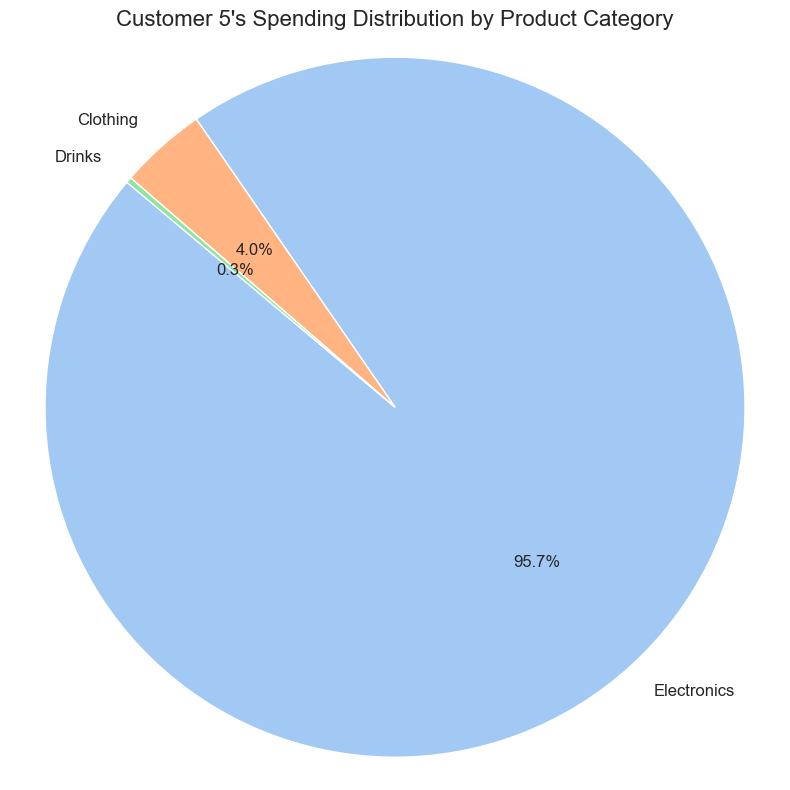

In [12]:
result = agent.analyze(
    "show me what customer 5 spends most of his money on",
    include_viz=True,
    execute=True
)

order_date
2021-02-23       9.99
2021-04-15      79.99
2021-05-03      49.99
2021-05-06      79.99
2021-05-23       5.99
2021-06-14       1.49
2021-06-26      59.99
2021-07-09      49.99
2021-08-30       3.99
2021-09-09       5.99
2021-10-19      29.98
2021-11-05       5.99
2021-12-14     199.99
2022-01-27      92.98
2022-02-09       0.89
2022-03-14    1299.99
2022-03-29       5.99
2022-04-02     799.99
2022-05-07    3299.98
2022-06-14    2499.99
2022-08-02      59.99
2022-08-15      29.98
2022-08-22      89.99
2022-09-01    2499.99
2022-09-15       3.99
2022-09-20    1299.99
2022-10-05    2499.99
2022-11-19       1.99
2022-11-23      92.98
2022-12-26       0.89
2023-01-15      79.99
2023-01-23       0.99
2023-02-03       3.99
2023-03-03    3299.98
2023-05-02       1.49
2023-05-10    1299.99
Name: spending, dtype: float64


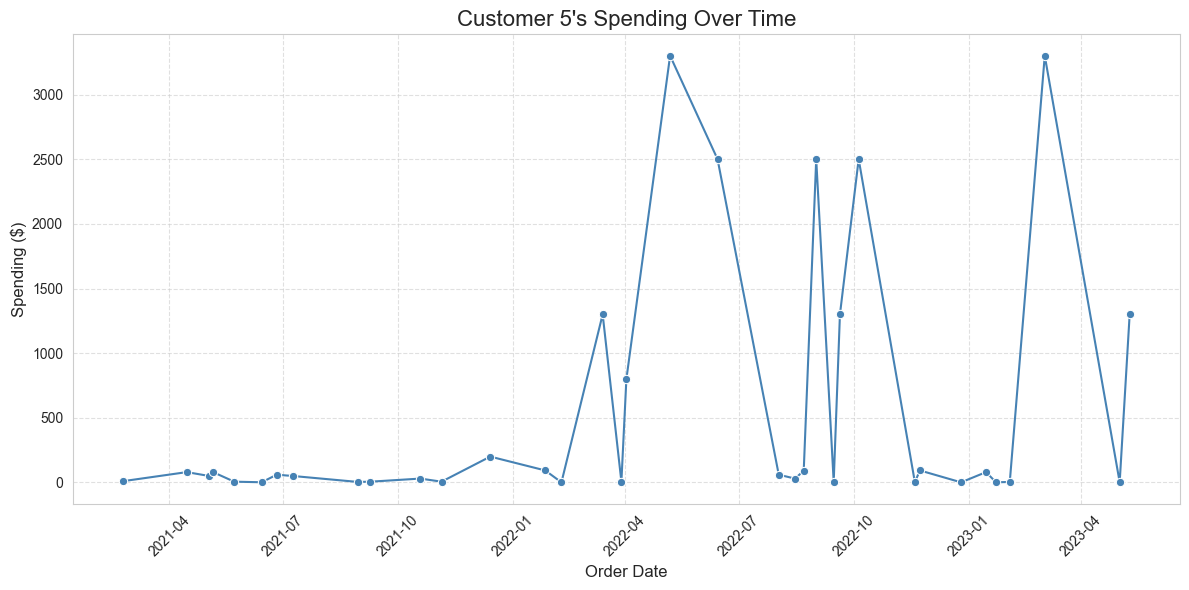

In [13]:
result = agent.analyze(
    "show me customer 5's spending over time",
    include_viz=True,
    execute=True
)

In [4]:
result = agent.analyze(
    "what will revenue look like for 2026?",
    include_viz=True,
    execute=True
)

In [5]:
result

{'question': 'what will revenue look like for 2026?',
 'code': 'import pandas as pd\n\n# Load necessary data\ndf_orders = pd.read_csv(\'../data/orders.csv\')\ndf_products = pd.read_csv(\'../data/products.csv\')\n\n# Convert order_date to datetime\ndf_orders[\'order_date\'] = pd.to_datetime(df_orders[\'order_date\'], errors=\'coerce\')\n\n# Filter orders for years up to 2025 to build a time series for forecasting\ndf_orders = df_orders[df_orders[\'order_date\'].notna()]\ndf_orders = df_orders[df_orders[\'order_date\'].dt.year <= 2025]\n\n# Merge orders with products to get product_price\ndf_merged = pd.merge(df_orders, df_products[[\'product_id\', \'product_price\']], on=\'product_id\', how=\'left\')\n\n# Calculate revenue per order line\ndf_merged[\'revenue\'] = df_merged[\'product_price\']\n\n# Aggregate monthly revenue to build a time series\ndf_merged[\'order_month\'] = df_merged[\'order_date\'].dt.to_period(\'M\')\nmonthly_revenue = df_merged.groupby(\'order_month\')[\'revenue\'].s